In [26]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pickle

# Data gathering

In [2]:
df=pd.read_csv(r"C:\Users\sanskriti\S.python\Datasets\IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# EDA

In [3]:
df.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe() # Statistical info

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 5)

In [8]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Check for the outliers

In [9]:
q1 = df["sepal_width"].quantile(0.25)
q3 = df["sepal_width"].quantile(0.75)

iqr = q3-q1

upper_tail = q3+1.5*iqr
lower_tail = q1-1.5*iqr

In [10]:
print(upper_tail)
print(lower_tail)

4.05
2.05


<Axes: >

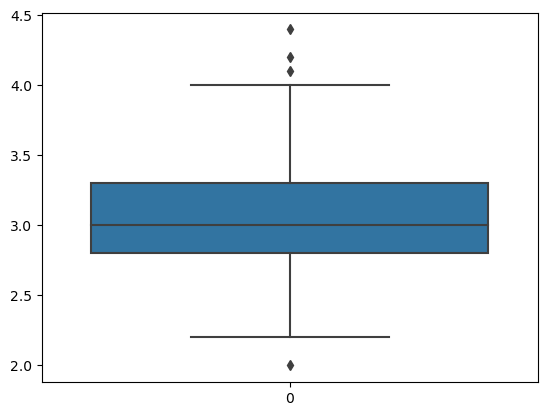

In [11]:
sns.boxplot(df["sepal_width"])

# Feature Engineering

In [12]:
df["sepal_width"] = df["sepal_width"].apply(lambda x:upper_tail if x>upper_tail else(lower_tail if x<lower_tail else x))

<Axes: >

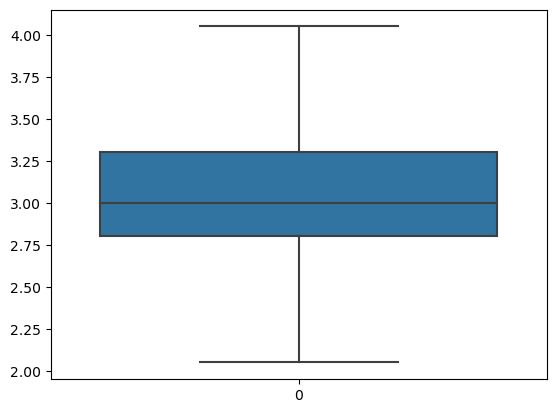

In [13]:
sns.boxplot(df["sepal_width"])

In [14]:
df['species']=df['species'].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# feature selection

In [16]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.110343,0.871754,0.817954,0.782561
sepal_width,-0.110343,1.000000,-0.419823,-0.355582,-0.419264
petal_length,0.871754,-0.419823,1.000000,0.962757,0.949043
petal_width,0.817954,-0.355582,0.962757,1.000000,0.956464
species,0.782561,-0.419264,0.949043,0.956464,1.000000


# Visualization 

<Axes: xlabel='species', ylabel='count'>

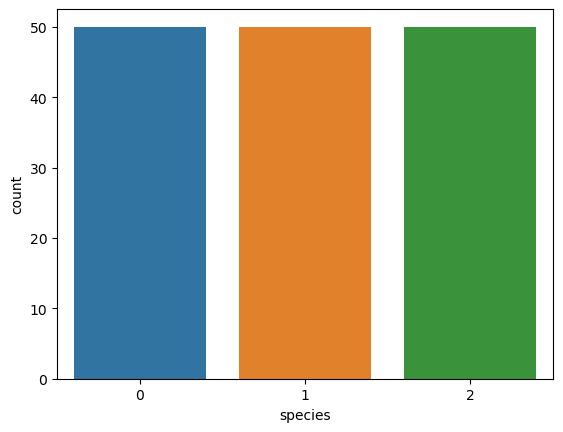

In [17]:
sns.countplot(x=df["species"])

<Axes: >

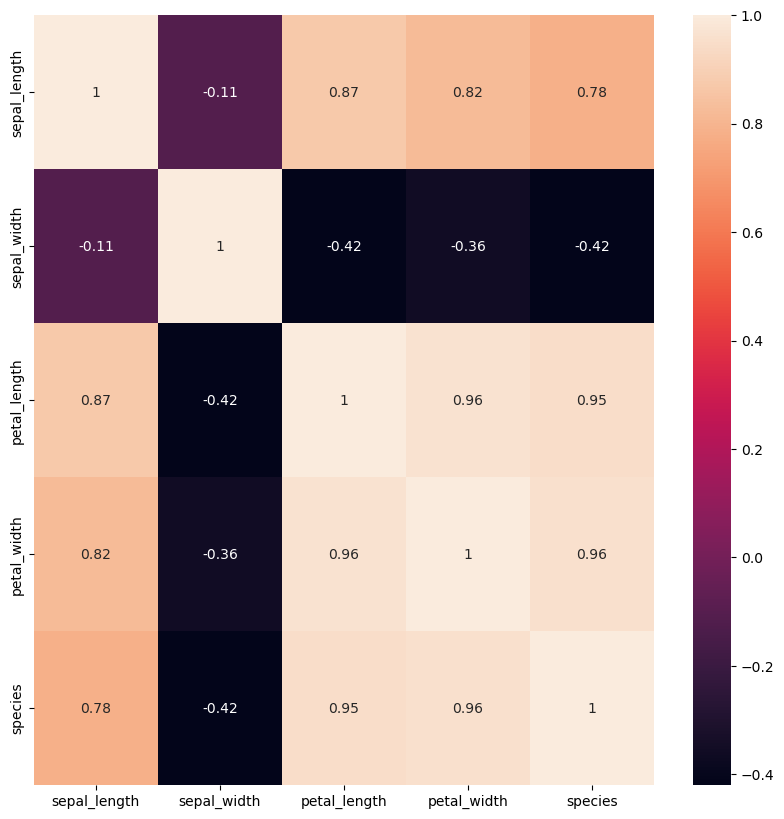

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [56]:
colors=['orange','Green','Red']
species=[0,1,2]

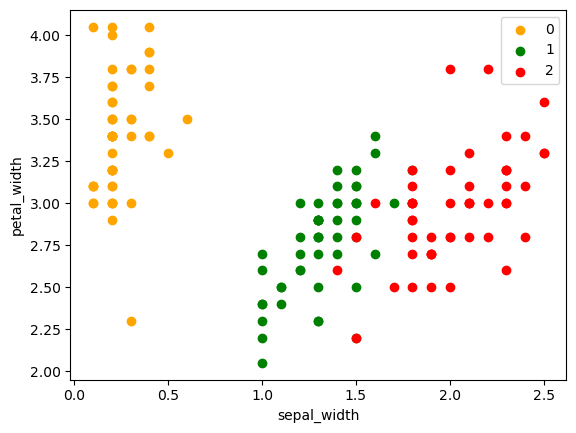

In [57]:
for i in range(3):
    x1=df[df['species']==species[i]]
    plt.scatter(x1['petal_width'],x1['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.legend()  

# Model Training

In [23]:
x=df.drop(columns=["species"])
y=df["species"]

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

# logistic Regression

In [59]:
log_clf=LogisticRegression(multi_class="ovr")
log_clf_model=log_clf.fit(xtrain,ytrain)
log_clf_model

LogisticRegression(multi_class='ovr')

# Model evaluation

In [60]:
ytrain_predict=log_clf_model.predict(xtrain) # training

In [61]:
accuracy = accuracy_score(ytrain,ytrain_predict)
print(f"Accuracy : {accuracy}")

conf_matrix = confusion_matrix(ytrain,ytrain_predict)
print(conf_matrix)


class_report = classification_report(ytrain,ytrain_predict)
print(class_report)


Accuracy : 0.9333333333333333
[[40  0  0]
 [ 0 34  6]
 [ 0  2 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.94      0.85      0.89        40
           2       0.86      0.95      0.90        40

    accuracy                           0.93       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.93      0.93       120



In [62]:
ytest_predict=log_clf_model.predict(xtest)

In [63]:
accuracy = accuracy_score(ytest,ytest_predict)
print(f"Accuracy : {accuracy}")


conf_matrix = confusion_matrix(ytest,ytest_predict)
print(conf_matrix)


class_report = classification_report(ytest,ytest_predict)
print(class_report)


Accuracy : 0.9666666666666667
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Decision Tree

In [64]:
dt=DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [65]:
dt_model=dt.fit(xtrain,ytrain)
dt_model

DecisionTreeClassifier()

In [66]:
ytrain_predict1=dt_model.predict(xtrain) # on training

In [67]:
accuracy = accuracy_score(ytrain,ytrain_predict1)
print(f"Accuracy : {accuracy}")


conf_matrix = confusion_matrix(ytrain,ytrain_predict1)
print(conf_matrix)


class_report = classification_report(ytrain,ytrain_predict1)
print(class_report)

Accuracy : 1.0
[[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [68]:
ytest_predict1=dt_model.predict(xtest)

In [69]:
accuracy = accuracy_score(ytest,ytest_predict1)
print(f"Accuracy : {accuracy}")


conf_matrix = confusion_matrix(ytest,ytest_predict1)
print(conf_matrix)


class_report = classification_report(ytest,ytest_predict1)
print(class_report)

Accuracy : 0.9666666666666667
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [70]:
hyperparameters={"criterion":["entropy","gini"],
                "max_depth":np.arange(1,10),
                "min_samples_split":np.arange(2,10),
                "min_samples_leaf":np.arange(2,10),}

In [71]:
random_search_model=RandomizedSearchCV(dt_model,hyperparameters,error_score="raise",cv=5)
random_search_model

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [72]:
random_search_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [73]:
random_search_model.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, min_samples_split=5)

In [74]:
hyp_dt_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=7)

In [75]:
hyp_dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=7)

In [76]:
ypred_train = hyp_dt_model.predict(xtrain)

Accuracy = 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.97      0.95        40
           2       0.97      0.93      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

Axes(0.125,0.11;0.62x0.77)


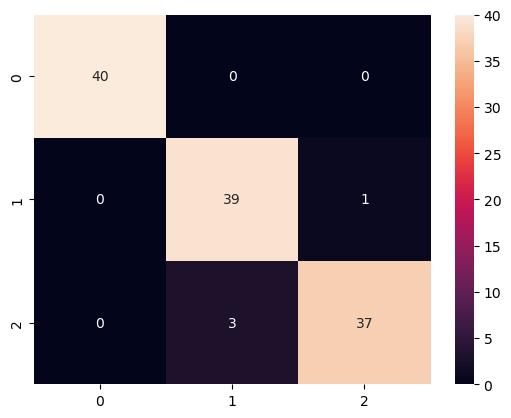

In [77]:
print(f"Accuracy = {accuracy_score(ytrain,ypred_train)}")
print(classification_report(ytrain,ypred_train))
print(sns.heatmap(confusion_matrix(ytrain,ypred_train),annot=True))

In [78]:
ypred_test = hyp_dt_model.predict(xtest)

In [79]:
print(f"Accuracy = {accuracy_score(ytest,ypred_test)}")
print(confusion_matrix(ytest,ypred_test))
print(classification_report(ypred_test,ytest))

Accuracy = 0.9333333333333333
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.83      0.91        12
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



# Creating Pickle

In [49]:
with open("iris.pkl","wb") as f:
    pickle.dump(random_search_model,f)

In [50]:
class prediction():
    def IRIS(self,testing_data):
        with open("iris.pkl","rb") as f:
            model = pickle.load(f)
            prediction=model.predict(testing_data)
            print('prediction=',prediction)
        return prediction

In [51]:
predict=prediction()

In [52]:
testing_data=x.head(8)

In [53]:
predict.IRIS(testing_data)

prediction= [0 0 0 0 0 0 0 0]


array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)